In [1]:
import pymongo
import json
import requests
import datetime
import csv
import codecs
import pprint

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#
#  这个python程序的目的是：
#      1.查看那些出价不变的词的数据
#
#

# 显示数据图
SHOW = True

#       APPID, Keyword_id, Keyword_name,
WDS = [
    # 高德
    ('b33e77f31fe04969803d8c93eee90701','41204679123','导航下载', True),
    ('b33e77f31fe04969803d8c93eee90701','41204679138','语音导航', True),
    ('b33e77f31fe04969803d8c93eee90701','41204679141','手机导航', True),
    ('b33e77f31fe04969803d8c93eee90701','52066904374','导航地图下载', True),
    ('b33e77f31fe04969803d8c93eee90701','41204679126','手机导航下载', False),
    ('b33e77f31fe04969803d8c93eee90701','52257602639','手机导航地图',False),    
    ('b33e77f31fe04969803d8c93eee90701','41204679597','离线导航',False), 
    ('b33e77f31fe04969803d8c93eee90701','52257602606','手机导航下载',False),
    # 触宝
    ('99f34fe1ac3c472ca60f67296f2dabed','51851122225','有信电话免费下载', True),
    ('99f34fe1ac3c472ca60f67296f2dabed','51683066718','微会下载打电话免费', True),
    ('99f34fe1ac3c472ca60f67296f2dabed','52549511179','移动无限流量', True),
    ('99f34fe1ac3c472ca60f67296f2dabed','51683066700','微会', True),
    ('99f34fe1ac3c472ca60f67296f2dabed','52549510906','移动无限流量卡', True),
    ('99f34fe1ac3c472ca60f67296f2dabed','51662818937','网络电话', False),
    ('99f34fe1ac3c472ca60f67296f2dabed','51683068212','免费电话软件', False),
    ('99f34fe1ac3c472ca60f67296f2dabed','51683068299','免费电话', False),
    ('99f34fe1ac3c472ca60f67296f2dabed','51683067966','网络电话永久免费打', False),
    ('99f34fe1ac3c472ca60f67296f2dabed','51662819099','网络电话软件', False),
]


# 获取两个时间的时间差，返回秒数
def get_time_range(t1_str, t2_str):
    t1 = datetime.datetime.strptime(t1_str, '%Y-%m-%d %H:%M:%S')
    t2 = datetime.datetime.strptime(t2_str, '%Y-%m-%d %H:%M:%S')
    if t1.day != t2.day:
        return -1
    return (t2 - t1).total_seconds()

def get_report(appid, kid):
    url = 'http://101.200.123.215/baiduapi/kwrank/%s/dump/%s/2016-10-17/2016-10-17' % (appid, kid)
    r = requests.get(url)
    data = r.json()['data']
    return data

#print(get_report('b33e77f31fe04969803d8c93eee90701','41204679126'))
   

手机导航下载 41204679126


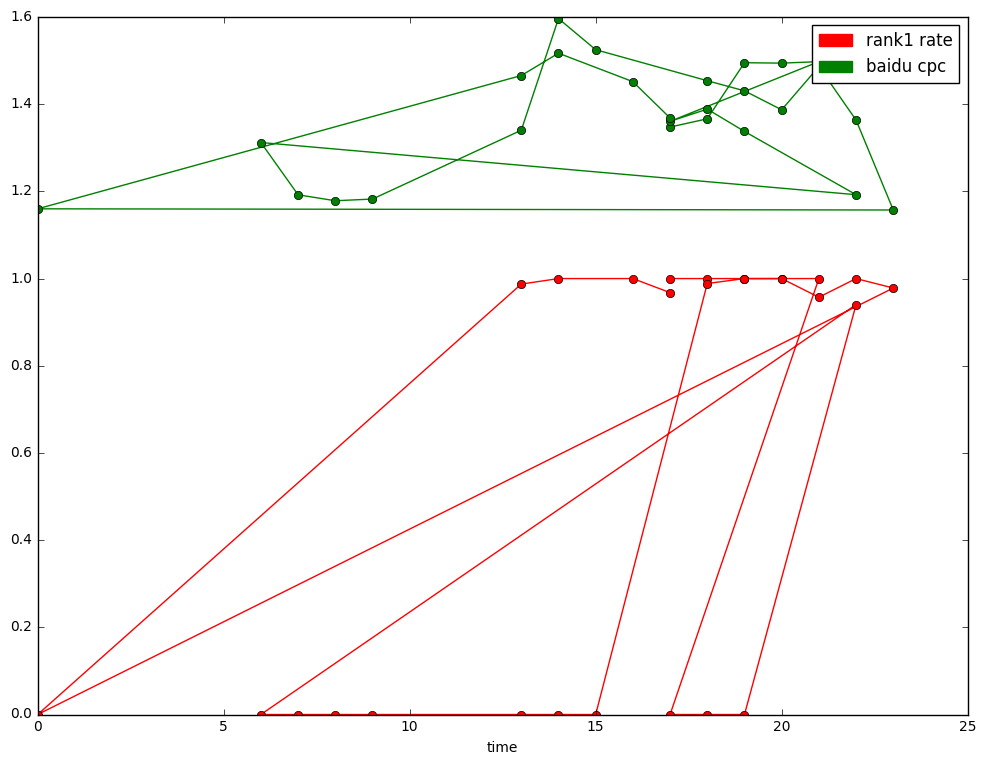

手机导航地图 52257602639


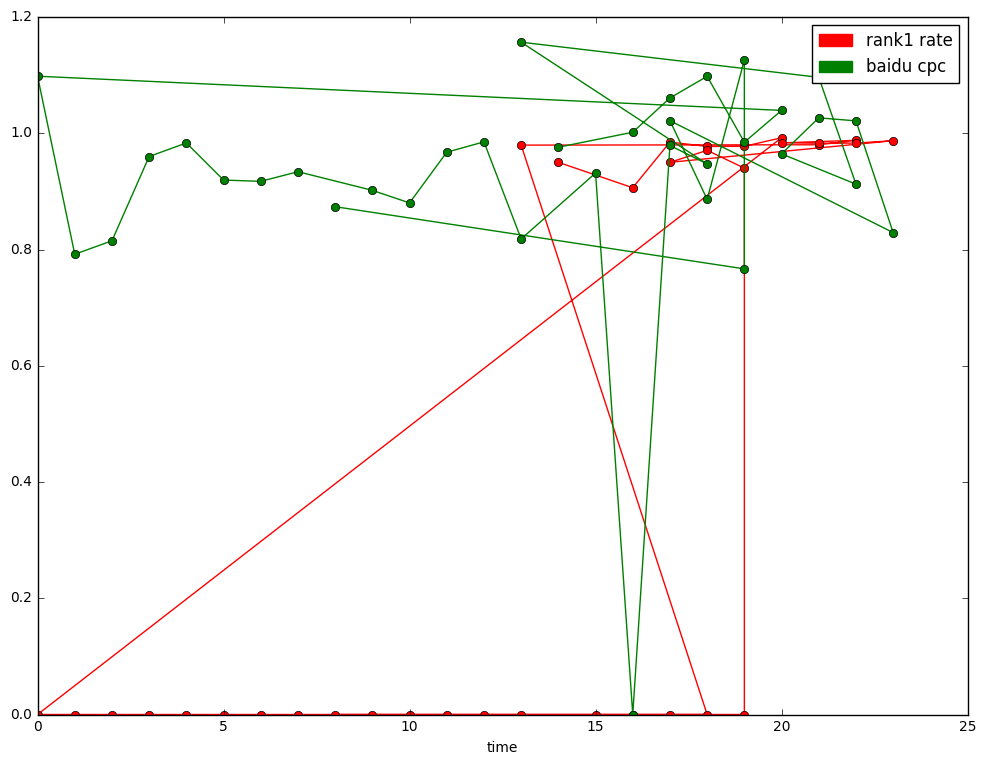

离线导航 41204679597


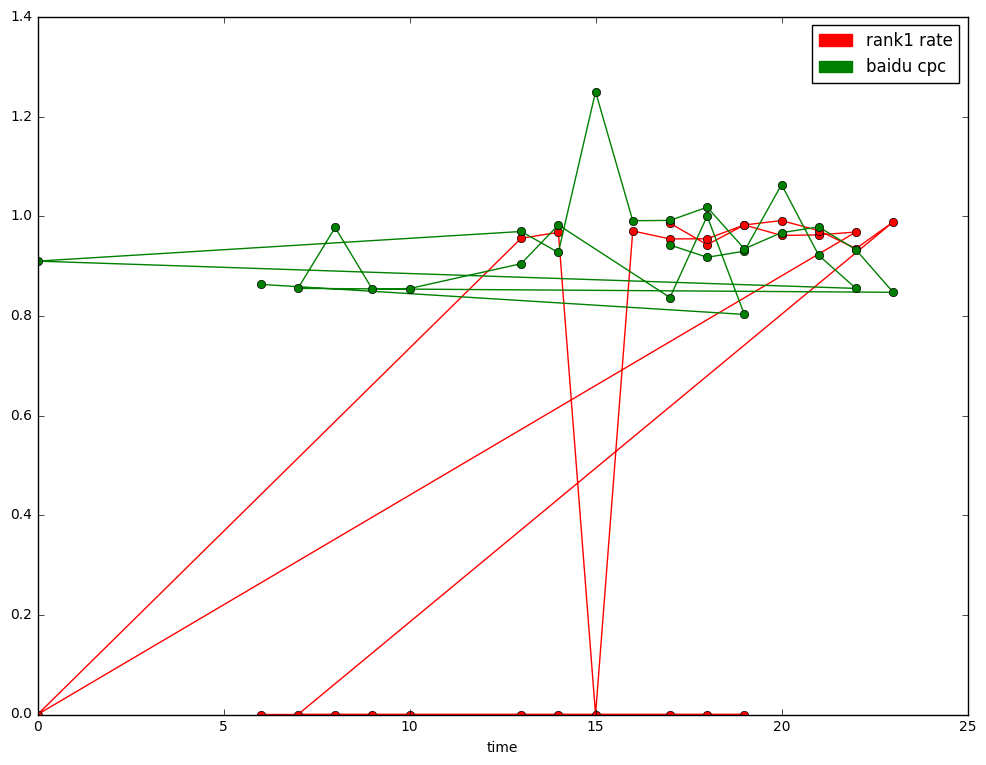

手机导航下载 52257602606


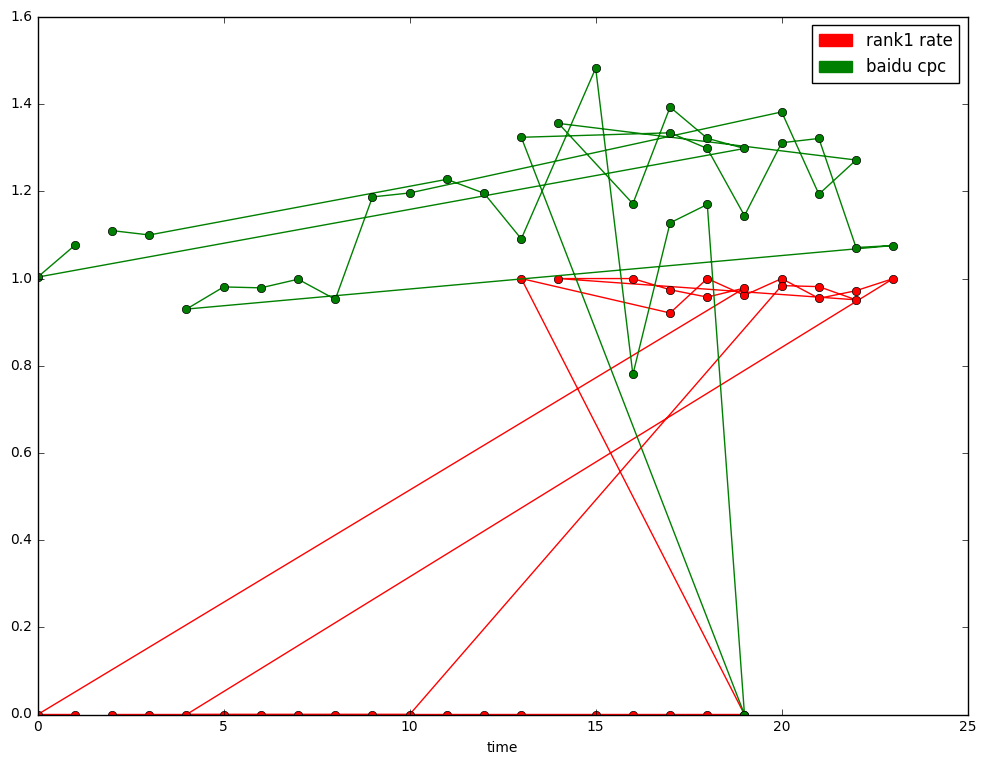

网络电话 51662818937


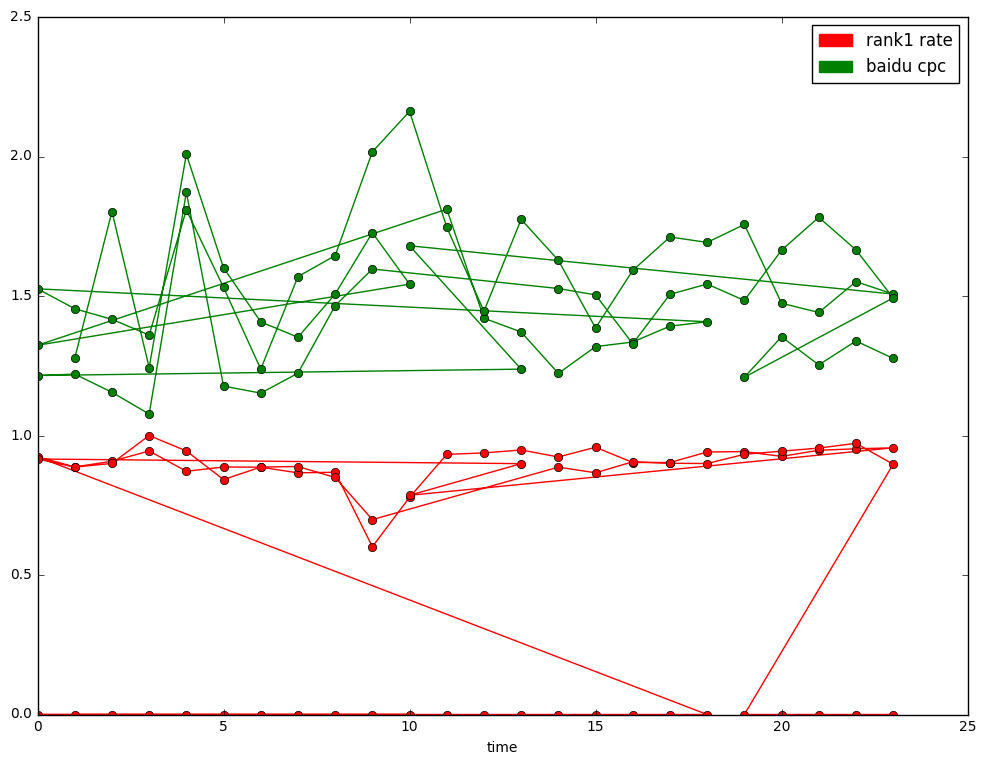

免费电话软件 51683068212


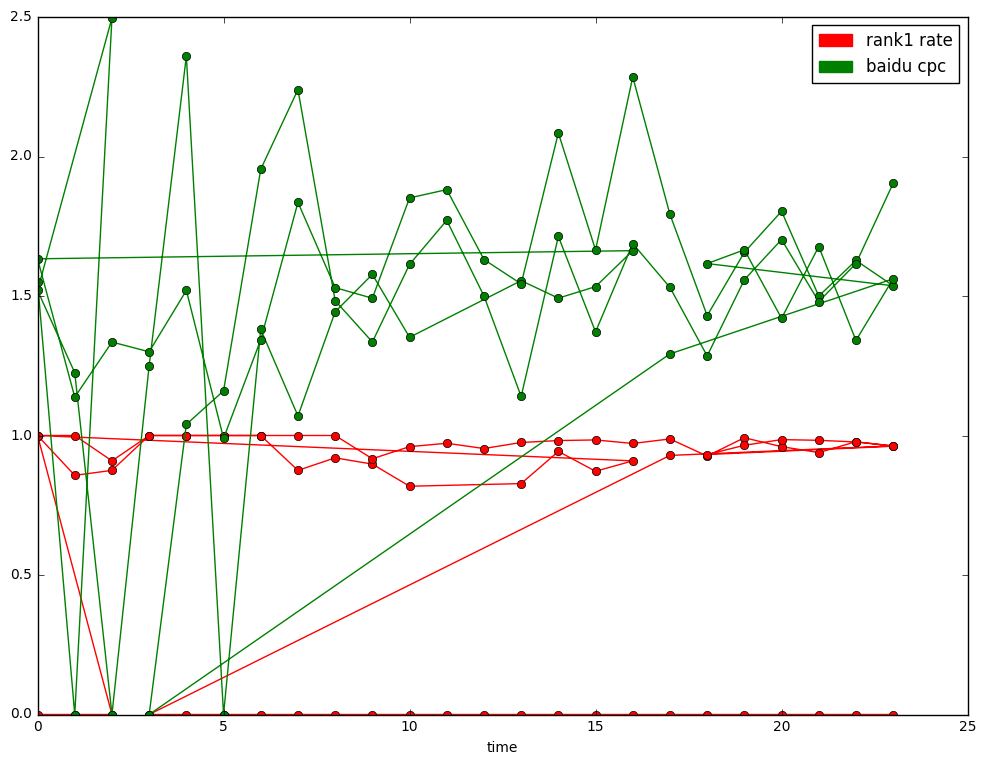

免费电话 51683068299


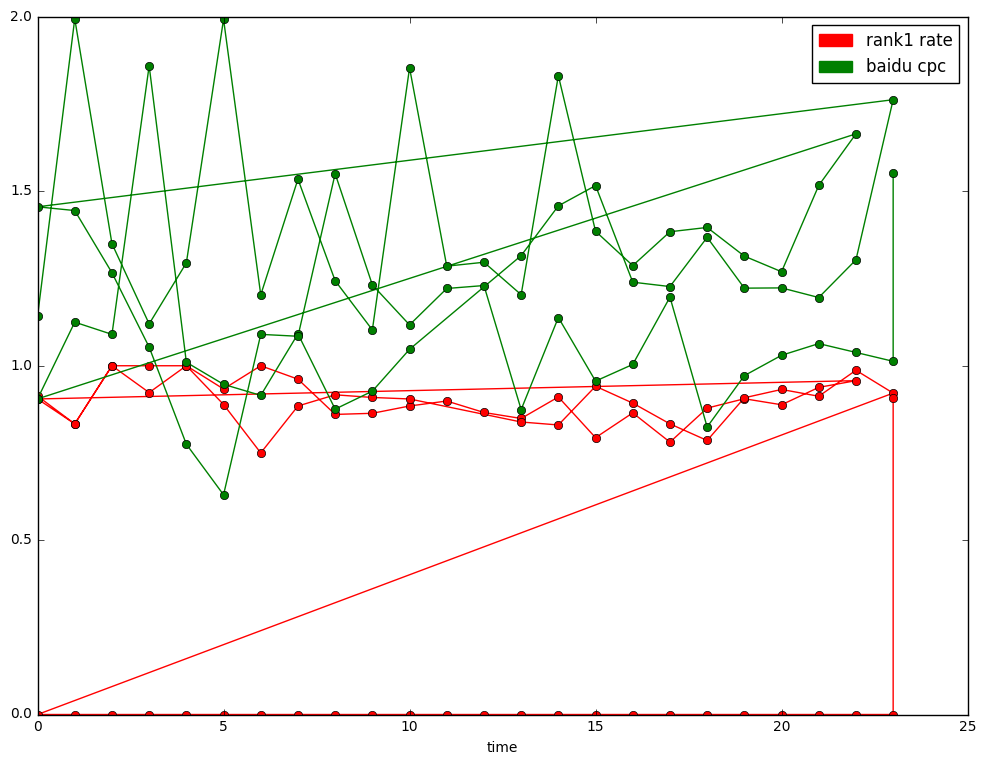

网络电话永久免费打 51683067966


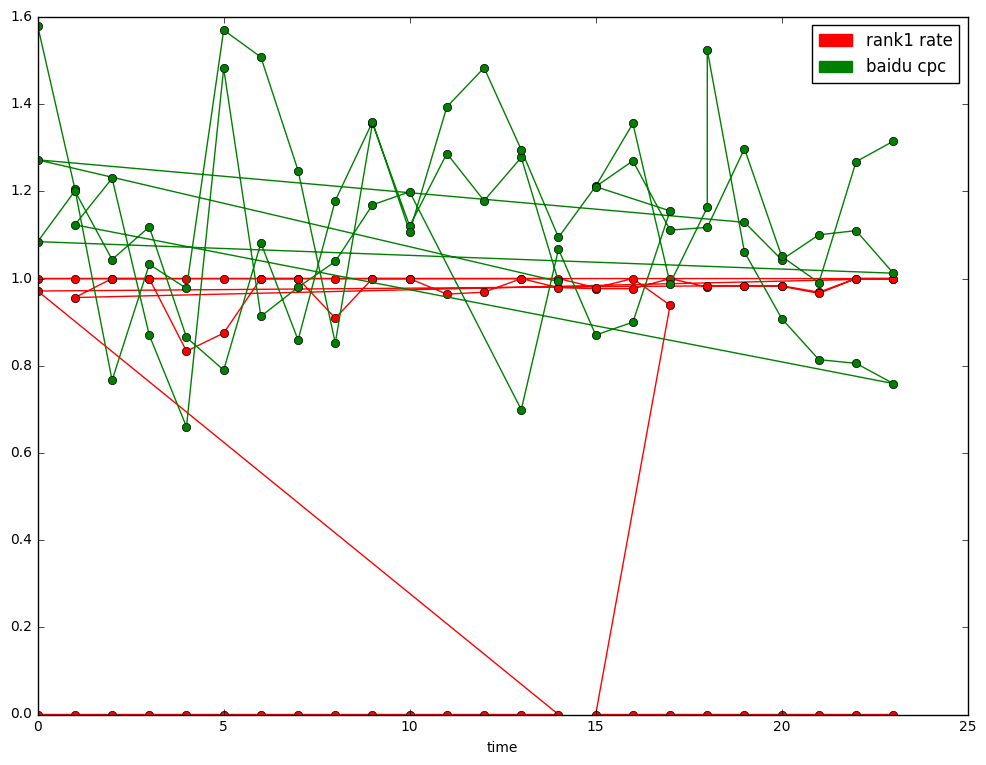

网络电话软件 51662819099


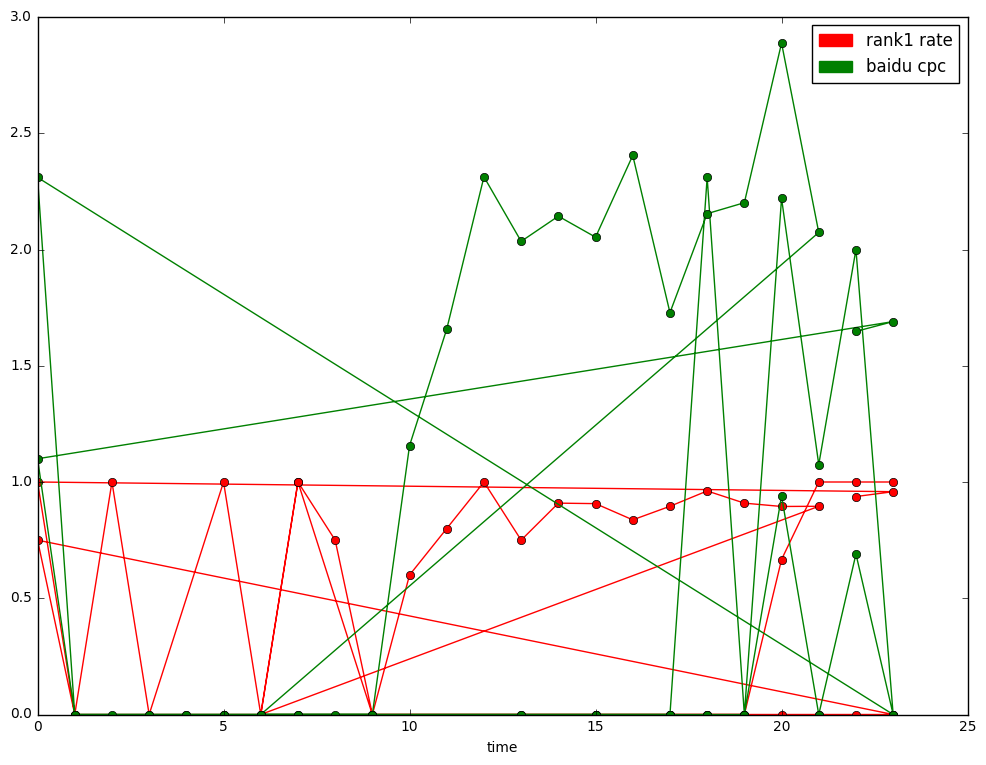

In [18]:
 

for appid,kid,kname,RTB in WDS:

    if RTB:
        continue
        
    print(kname,kid)
    price = []
    rank1rate = []
    hour = []    
    baidu_impression = []
    baidu_click = []
    baidu_cost = []
    baidu_cpc = []
       
    data = get_report(appid, kid)
    
    for r in data:
        if r['kpi4']:
            i_rank1rate = float(r['kpi0']/r['kpi4'])
        else:
            i_rank1rate = 0
        if r['baidu_click']:
            i_cpc = float(r['baidu_cost']/ r['baidu_click'])
        else:
            i_cpc = 0
            
        rank1rate.append(i_rank1rate)
        hour.append(r['hour'])
        
        baidu_impression.append(r['baidu_impression'])
        baidu_click.append(r['baidu_click'])
        baidu_cost.append(r['baidu_cost'])
        baidu_cpc.append(i_cpc)
            
    if SHOW:
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 12
        fig_size[1] = 9
        plt.rcParams["figure.figsize"] = fig_size
                
        if True:               
            line1 = plt.plot(hour, rank1rate,'o-r')
            line2 = plt.plot(hour, baidu_cpc,'o-g')
   
            plt.xlabel('time')
                
            le1 = mpatches.Patch(color='red', label='rank1 rate')
            le2 = mpatches.Patch(color='green', label='baidu cpc')

            plt.legend(handles=[le1,le2])
                
            #plt.gcf().autofmt_xdate(bottom=0.1, rotation=30, ha='right')
            #plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
                
            plt.show()
        if False:
            line1 = plt.plot(hour, baidu_click,'o-r')
            line2 = plt.plot(hour, baidu_cost,'o-g')
                
            plt.xlabel('time')
                
            le1 = mpatches.Patch(color='red', label='H5 Download')
            le2 = mpatches.Patch(color='green', label='Total Download')

            plt.legend(handles=[le1,le2])
                
            plt.show()
